In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import pandas as pd

In [10]:
import os
os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/stock_data')[:2]

['ASIANPAINT.csv', 'BAJAJ-AUTO.csv']

In [11]:
!pip install dabl

import dabl

     |████████████████████████████████| 573kB 10.4MB/s 
  Created wheel for dabl: filename=dabl-0.1.9-cp36-none-any.whl size=572788 sha256=b1b7d5a865bbe551d15aaad2c0030994d6218c4ac107d6c6fbfbdbdf83e6b110
  Stored in directory: /root/.cache/pip/wheels/5c/cc/90/94172b7b3c03126e869bba34ed3852a617ddc6621ad1385697
Successfully built dabl


In [12]:
import dabl

In [13]:
##This DABL library help us to find missing data, feature type , if data is continuous , will also help us to take decision if column is useless or not

In [14]:
SBIN_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/stock_data/SBIN.csv',index_col='Date',parse_dates=True)

In [15]:
SBIN_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


In [16]:
dabl.detect_types(SBIN_df)

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['Symbol', 'Series']
  near_constant.index[near_constant].tolist()))


,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Symbol,False,False,False,False,False,False,True
Series,False,False,False,False,False,False,True
Prev Close,True,False,False,False,False,False,False
Open,True,False,False,False,False,False,False
High,True,False,False,False,False,False,False
Low,True,False,False,False,False,False,False
Last,True,False,False,False,False,False,False
Close,True,False,False,False,False,False,False
VWAP,True,False,False,False,False,False,False
Volume,True,False,False,False,False,False,False


In [17]:
SBIN_df.shape

(5184, 14)

In [18]:
SBIN_clean_df = dabl.clean(SBIN_df, verbose=1)

Detected feature types:
11 float, 1 int, 2 object, 0 date, 0 other
Interpreted as:
continuous      12
dirty_float      0
low_card_int     0
categorical      0
date             0
free_string      0
useless          2
dtype: int64


/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['Symbol', 'Series']
  near_constant.index[near_constant].tolist()))


In [19]:
SBIN_clean_df.shape

(5184, 12)

In [20]:
dabl.detect_types(SBIN_clean_df)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Prev Close,True,False,False,False,False,False,False
Open,True,False,False,False,False,False,False
High,True,False,False,False,False,False,False
Low,True,False,False,False,False,False,False
Last,True,False,False,False,False,False,False
Close,True,False,False,False,False,False,False
VWAP,True,False,False,False,False,False,False
Volume,True,False,False,False,False,False,False
Turnover,True,False,False,False,False,False,False
Trades,True,False,False,False,False,False,False


In [21]:
SBIN_clean_df.head(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-03,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
2000-01-04,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN


In [22]:
#SBIN_clean_df=SBIN_clean_df.set_index('Date')

In [23]:
SBIN_clean_df.head(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-03,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
2000-01-04,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN


In [24]:
##converting it into datetime 

In [25]:
#SBIN_clean_df.index=pd.to_datetime(SBIN_clean_df.index)


In [26]:
SBIN_clean_df.head(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-03,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
2000-01-04,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN


In [27]:
## Running statistical test to check if data is stationary or not ,
## Reason for this is Arima model better  only if data is stationary

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
def myAdaTest(df):
  df_op=adfuller(df,maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
  print('ADF:',df_op[0])
  print('p-value:',df_op[1])
  print('no-of-lag:',df_op[2])
  print("Num Of Observations Used For ADF Regression:",      df_op[3])
  print("Critical Values :")
  for key, val in df_op[4].items():
     print("\t",key, ": ", val)


In [30]:
## if p-value is less than 0.05 means data is stationary and we failed to reject null hypothesis , hence we can use it in arima model

In [31]:
for i in SBIN_clean_df[['Prev Close'	,'Open'	,'High'	,'Low'	,'Last'	,'Close'	,'VWAP'	,'Volume'	,'Turnover']].columns:
  print('evaluating for ',i)
  print('/n')
  myAdaTest(SBIN_clean_df[i])

evaluating for  Prev Close
/n
ADF: -1.9184674068391174
p-value: 0.32342395072505176
no-of-lag: 3
Num Of Observations Used For ADF Regression: 5180
Critical Values :
	 1% :  -3.431613039285884
	 5% :  -2.862098131055356
	 10% :  -2.5670670931038595
evaluating for  Open
/n
ADF: -1.8407612836030316
p-value: 0.36042073939731134
no-of-lag: 5
Num Of Observations Used For ADF Regression: 5178
Critical Values :
	 1% :  -3.431613527376366
	 5% :  -2.8620983466944008
	 10% :  -2.567067207896378
evaluating for  High
/n
ADF: -1.8929298790689941
p-value: 0.3353943937535781
no-of-lag: 3
Num Of Observations Used For ADF Regression: 5180
Critical Values :
	 1% :  -3.431613039285884
	 5% :  -2.862098131055356
	 10% :  -2.5670670931038595
evaluating for  Low
/n
ADF: -1.9588105868305785
p-value: 0.30491995005788186
no-of-lag: 2
Num Of Observations Used For ADF Regression: 5181
Critical Values :
	 1% :  -3.4316127953820246
	 5% :  -2.862098023298283
	 10% :  -2.5670670357408465
evaluating for  Last
/n
ADF

In [32]:
# from above we can see non of the feature is stationary from p-value ## Adf is negative hence it is more likely to be stationary
## to make data stationary we use diff method and after that drop na for top

In [33]:



for i in SBIN_clean_df[['Prev Close'	,'Open'	,'High'	,'Low'	,'Last'	,'Close'	,'VWAP'	,'Volume'	,'Turnover']].columns:
  SBIN_clean_df[i+str('_diff')]=SBIN_clean_df[i].diff().dropna()
  

In [34]:
SBIN_clean_df.head(1)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Prev Close_diff,Open_diff,High_diff,Low_diff,Last_diff,Close_diff,VWAP_diff,Volume_diff,Turnover_diff
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,225.6,236.0,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
SBIN_clean_df.drop(['Trades','Deliverable Volume',	'%Deliverble'],inplace=True,axis=1)

In [36]:
SBIN_clean_df=SBIN_clean_df.dropna()

In [37]:

for i in SBIN_clean_df[['Prev Close_diff'	,'Open_diff'	,'High_diff'	,'Low_diff',	'Last_diff'	,'Close_diff',	'VWAP_diff',	'Volume_diff'	,'Turnover_diff']].columns:
  print('evaluating for ',i)
  print('/n')
  myAdaTest(SBIN_clean_df[i])

evaluating for  Prev Close_diff
/n
ADF: -43.06581372517176
p-value: 0.0
no-of-lag: 2
Num Of Observations Used For ADF Regression: 5180
Critical Values :
	 1% :  -3.431613039285884
	 5% :  -2.862098131055356
	 10% :  -2.5670670931038595
evaluating for  Open_diff
/n
ADF: -34.07825418317747
p-value: 0.0
no-of-lag: 4
Num Of Observations Used For ADF Regression: 5178
Critical Values :
	 1% :  -3.431613527376366
	 5% :  -2.8620983466944008
	 10% :  -2.567067207896378
evaluating for  High_diff
/n
ADF: -43.04869926537105
p-value: 0.0
no-of-lag: 2
Num Of Observations Used For ADF Regression: 5180
Critical Values :
	 1% :  -3.431613039285884
	 5% :  -2.862098131055356
	 10% :  -2.5670670931038595
evaluating for  Low_diff
/n
ADF: -52.37476427805238
p-value: 0.0
no-of-lag: 1
Num Of Observations Used For ADF Regression: 5181
Critical Values :
	 1% :  -3.4316127953820246
	 5% :  -2.862098023298283
	 10% :  -2.5670670357408465
evaluating for  Last_diff
/n
ADF: -43.072257927221955
p-value: 0.0
no-of-l

In [38]:
## hence from above we can see that p_value is less than 0.05 and ADF is further redece giving us confidenece that above data is stationary

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 20.8MB/s 
     |████████████████████████████████| 808kB 56.1MB/s 
     |████████████████████████████████| 2.1MB 52.8MB/s 
     |████████████████████████████████| 8.7MB 20.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [39]:
from pmdarima import auto_arima

In [40]:
fit_VWAP_diff=auto_arima(SBIN_clean_df['VWAP_diff'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=54082.673, Time=3.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=54130.151, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=54089.733, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=54088.223, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54128.151, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=54084.850, Time=2.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=54082.622, Time=2.51 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=54089.965, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=54088.476, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=54082.611, Time=3.42 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=54082.572, Time=0.56 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=54083.521, Time=0.68 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=54085.578, Time=0.91 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=54080.573, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0

In [41]:
fit_VWAP_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5183
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -27036.286
Date:                Mon, 30 Nov 2020   AIC                          54080.573
Time:                        16:45:27   BIC                          54106.785
Sample:                             0   HQIC                         54089.743
                               - 5183                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0916      0.003     30.784      0.000       0.086       0.097
ar.L2         -0.0214      0.012     -1.783      0.075      -0.045       0.002
ar.L3         -0.0390      0.007     -5.743      0.000      -0.052      -0.026
sigma2      1988.9388      2.011    989.080      0.000    1984.997    1992.880
===================================================================================
Ljung-Box (Q):                       32.77   Jarque-Bera (JB):        1180020729.96
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              48.13   Skew:                           -39.55
Prob(H) (two-sided):                  0.00   Kurtosis:                      2339.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
## so we can see that our best fit model is arima model with parameter (3, 0, 0)

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
SBIN_clean_df.shape

(5183, 18)

In [45]:
SBIN_clean_df.shape[0]*0.90

4664.7

In [46]:
train=SBIN_clean_df.iloc[:4665]
test=SBIN_clean_df.iloc[4665:]

In [47]:
train.shape

(4665, 18)

In [48]:
test.shape

(518, 18)

In [49]:
train['VWAP_diff']

Date
2000-01-04    10.63
2000-01-05     0.89
2000-01-06     9.83
2000-01-07     6.84
2000-01-10    10.77
              ...  
2018-09-19    -3.77
2018-09-21    -1.28
2018-09-24    -5.72
2018-09-25    -1.00
2018-09-26     0.88
Name: VWAP_diff, Length: 4665, dtype: float64

In [50]:
model_VWAP_diff=ARIMA(train['VWAP_diff'],order = (3, 0, 0))
model_VWAP_diff=model_VWAP_diff.fit()
model_VWAP_diff.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              VWAP_diff   No. Observations:                 4665
Model:                     ARMA(3, 0)   Log Likelihood              -24576.453
Method:                       css-mle   S.D. of innovations             46.961
Date:                Mon, 30 Nov 2020   AIC                          49162.905
Time:                        16:45:27   BIC                          49195.145
Sample:                             0   HQIC                         49174.244
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0056      0.709      0.008      0.994      -1.385       1.396
ar.L1.VWAP_diff     0.0914      0.015      6.248      0.000       0.063       0.120
ar.L2.VWAP_diff    -0.0215      0.015     -1.463      0.143      -0.050       0.007
ar.L3.VWAP_diff    -0.0392      0.015     -2.678      0.007      -0.068      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4344           -2.3265j            2.7332           -0.1621
AR.2            1.4344           +2.3265j            2.7332            0.1621
AR.3           -3.4172           -0.0000j            3.4172           -0.5000
-----------------------------------------------------------------------------
"""

In [52]:
## if getting error value warning like ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting. 

In [51]:
#then we can use to_period method
#SBIN_clean_df.index = pd.DatetimeIndex(SBIN_clean_df.index).to_period('M')
#or 
#DatetimeIndex
SBIN_clean_df.index = pd.DatetimeIndex(SBIN_clean_df.index).to_period('d')


In [52]:
train=SBIN_clean_df.iloc[:4665]
test=SBIN_clean_df.iloc[4665:]

In [53]:
train['VWAP_diff'].shape

(4665,)

In [54]:


model_VWAP_diff=ARIMA(train['VWAP_diff'],order = (3, 0, 0))
model_VWAP_diff=model_VWAP_diff.fit()
model_VWAP_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              VWAP_diff   No. Observations:                 4665
Model:                     ARMA(3, 0)   Log Likelihood              -24576.453
Method:                       css-mle   S.D. of innovations             46.961
Date:                Mon, 30 Nov 2020   AIC                          49162.905
Time:                        16:45:37   BIC                          49195.145
Sample:                    01-04-2000   HQIC                         49174.244
                         - 09-26-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0056      0.709      0.008      0.994      -1.385       1.396
ar.L1.VWAP_diff     0.0914      0.015      6.248      0.000       0.063       0.120
ar.L2.VWAP_diff    -0.0215      0.015     -1.463      0.143      -0.050       0.007
ar.L3.VWAP_diff    -0.0392      0.015     -2.678      0.007      -0.068      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4344           -2.3265j            2.7332           -0.1621
AR.2            1.4344           +2.3265j            2.7332            0.1621
AR.3           -3.4172           -0.0000j            3.4172           -0.5000
-----------------------------------------------------------------------------
"""

In [55]:
start=len(train)
end=len(train)+len(test)-1
pred=model_VWAP_diff.predict(start=start,end=end)
#pred.index=SBIN_clean_df.index[start:end+1]

In [56]:
start

4665

In [57]:
end

5182

In [58]:
pred

2012-10-12    0.331389
2012-10-13    0.055961
2012-10-14   -0.031071
2012-10-15   -0.011617
2012-10-16    0.002821
                ...   
2014-03-09    0.005578
2014-03-10    0.005578
2014-03-11    0.005578
2014-03-12    0.005578
2014-03-13    0.005578
Freq: D, Length: 518, dtype: float64

In [59]:
#SBIN_clean_df[start:end+1]

In [60]:
###Predicting close value using arima

In [61]:
fit_Close_diff=auto_arima(SBIN_clean_df['Close_diff'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=54512.301, Time=5.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=54533.737, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=54522.703, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=54522.463, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54531.737, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=54518.926, Time=2.62 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=54517.554, Time=4.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=54516.554, Time=4.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=54516.787, Time=2.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=54524.402, Time=1.03 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=54514.808, Time=0.78 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=54514.659, Time=2.65 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=54516.264, Time=7.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=54510.300, Time=1.99 sec
 ARIMA(1,0,2)(0,0,0

In [62]:
fit_Close_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5183
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -27250.150
Date:                Mon, 30 Nov 2020   AIC                          54510.300
Time:                        16:46:41   BIC                          54543.066
Sample:                             0   HQIC                         54521.763
                               - 5183                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2929      0.077     16.832      0.000       1.142       1.443
ar.L2         -0.7902      0.076    -10.392      0.000      -0.939      -0.641
ma.L1         -1.2577      0.080    -15.732      0.000      -1.414      -1.101
ma.L2          0.7441      0.081      9.228      0.000       0.586       0.902
sigma2      2158.8492      2.633    819.835      0.000    2153.688    2164.010
===================================================================================
Ljung-Box (Q):                       31.04   Jarque-Bera (JB):         784921095.27
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              35.64   Skew:                           -33.95
Prob(H) (two-sided):                  0.00   Kurtosis:                      1908.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
## best model is ARIMA(2, 0, 2)

In [64]:
train['Close_diff'].head()

Date
2000-01-04    15.45
2000-01-05   -10.65
2000-01-06    12.55
2000-01-07    12.30
2000-01-10    -3.80
Freq: D, Name: Close_diff, dtype: float64

In [65]:
model_Close_diff=ARIMA(train['Close_diff'],order = (2, 0, 2))
model_Close_diff=model_Close_diff.fit()
model_Close_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Close_diff   No. Observations:                 4665
Model:                     ARMA(2, 2)   Log Likelihood              -24767.594
Method:                       css-mle   S.D. of innovations             48.925
Date:                Mon, 30 Nov 2020   AIC                          49547.188
Time:                        16:46:43   BIC                          49585.875
Sample:                    01-04-2000   HQIC                         49560.795
                         - 09-26-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0034      0.701      0.005      0.996      -1.370       1.377
ar.L1.Close_diff     1.2919      0.098     13.218      0.000       1.100       1.483
ar.L2.Close_diff    -0.7896      0.138     -5.723      0.000      -1.060      -0.519
ma.L1.Close_diff    -1.2565      0.107    -11.720      0.000      -1.467      -1.046
ma.L2.Close_diff     0.7433      0.151      4.916      0.000       0.447       1.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8181           -0.7728j            1.1254           -0.1205
AR.2            0.8181           +0.7728j            1.1254            0.1205
MA.1            0.8453           -0.7943j            1.1599           -0.1201
MA.2            0.8453           +0.7943j            1.1599            0.1201
-----------------------------------------------------------------------------
"""

In [66]:
pred=model_Close_diff.predict(start=4000,end=4500)
#pred.index=SBIN_clean_df.index[start:end+1]
pred

Date
2016-01-20    0.441187
2016-01-21    0.162388
2016-01-22    0.377364
2016-01-25    0.583241
2016-01-27   -0.020992
                ...   
2018-01-19   -0.113059
2018-01-22   -0.000777
2018-01-23   -0.290319
2018-01-24    0.175135
2018-01-25    0.317892
Freq: D, Length: 501, dtype: float64

In [67]:
train['Close_diff'][4000:5000]

Date
2016-01-20   -9.30
2016-01-21    1.95
2016-01-22    9.00
2016-01-25   -1.65
2016-01-27    1.45
              ... 
2018-09-19   -2.30
2018-09-21   -0.90
2018-09-24   -6.25
2018-09-25    6.55
2018-09-26   -7.05
Freq: D, Name: Close_diff, Length: 665, dtype: float64

In [68]:
##arima was not able to predct our data well

In [69]:
##using LSTM

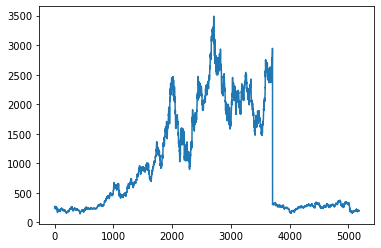

In [77]:
df1=SBIN_clean_df['Close'].reset_index().drop(['Date'],axis=1)
import matplotlib.pyplot as plt
plt.plot(df1)


In [81]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [82]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [83]:
train_data.shape

(3368, 1)

In [85]:
test_data.shape

(1815, 1)

In [87]:
train_data[:2]

array([[0.03513514],
       [0.03195461]])

In [90]:
#X_train = []
#y_train = []
## here for predicting i record we take last 60 records ,
## in lstm for predicting one record we go train it on last 60 days , while in arima we pass last period to predict next period 
##eg in lstm to predict stock for feb we pass for jan , to predict for mar we pass feb , but in arima to predict for feb march june any no of months we train it on jan


In [91]:
#for i in range(60, len(train_data)):
 #   X_train.append(training_set_scaled[i-60:i, 0])
  #  y_train.append(training_set_scaled[i, 0])
#X_train, y_train = np.array(X_train), np.array(y_train)


In [96]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [97]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [98]:
X_train.shape

(3267, 100)

In [100]:
X_test.shape

(1714, 100)

In [101]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [102]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [104]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
52/52 [==============================] - 2s 38ms/step - loss: 0.0118 - val_loss: 0.0031
Epoch 2/100
52/52 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 0.0029
Epoch 3/100
52/52 [==============================] - 1s 18ms/step - loss: 9.9489e-04 - val_loss: 0.0028
Epoch 4/100
52/52 [==============================] - 1s 18ms/step - loss: 8.2456e-04 - val_loss: 0.0024
Epoch 5/100
52/52 [==============================] - 1s 18ms/step - loss: 7.2530e-04 - val_loss: 0.0021
Epoch 6/100
52/52 [==============================] - 1s 18ms/step - loss: 8.1550e-04 - val_loss: 0.0021
Epoch 7/100
52/52 [==============================] - 1s 18ms/step - loss: 6.7579e-04 - val_loss: 0.0020
Epoch 8/100
52/52 [==============================] - 1s 18ms/step - loss: 6.2599e-04 - val_loss: 0.0022
Epoch 9/100
52/52 [==============================] - 1s 18ms/step - loss: 7.2017e-04 - val_loss: 0.0017
Epoch 10/100
52/52 [==============================] - 1s 18ms/step - los

In [106]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [107]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [108]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1534.960731813276

In [109]:
math.sqrt(mean_squared_error(ytest,test_predict))

900.1056502763998

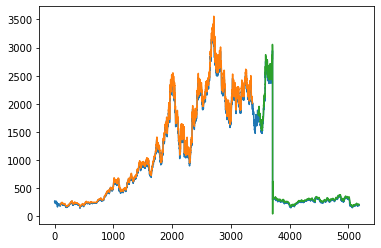

In [113]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()